# Build  spectra for AuxTel

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : March 30th 2021
- creation update : March 31th 2021
- version v0


This notebook is to help for finding the position of order 0

# Imports

In [68]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib import  transforms
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re

plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [69]:
from iminuit import Minuit
import iminuit

In [70]:
iminuit.__version__

'2.2.0'

In [71]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.images import *
from scipy import ndimage, misc

In [72]:
from scipy.stats import kurtosis,skew
from scipy.stats import kurtosistest,skewtest,normaltest

# Function

In [73]:
def file_target(filename):
    m=re.findall('^Cor_ronchi170lpmm_.*_(.*)_[0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*[.]fits$',filename)
    if len(m)>0:
        return m
    elif re.search('NGC4755',filename):
        return ['NGC4755']
    else:
        return []

# Logbook for file selection

In [74]:
filename_logbook='logbooks/auxtelronchi170lpmmlogbook_2021_v0.0.csv'

In [75]:
df=pd.read_csv(filename_logbook,index_col=0)

In [76]:
pd.set_option('display.max_rows', None)

In [77]:
df

,index,date,path,file,num,object,filter,disperser,airmass,exposure,...,temperature,humidity,windspd,Obj-posXpix,Obj-posYpix,Dx,Dy,skip,run,quality
0,0,2021-03-12T01:19:36.315,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_188...,188,HD75519,RG610,ronchi170lpmm,1.033813,5.0,...,11.7,50.0,0.9,NaN,NaN,NaN,NaN,,NaN,NaN
1,1,2021-03-12T01:20:18.220,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_189...,189,HD75519,RG610,ronchi170lpmm,1.033311,5.0,...,11.7,55.0,0.8,NaN,NaN,NaN,NaN,,NaN,NaN
2,2,2021-03-12T01:20:33.072,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_190...,190,HD75519,RG610,ronchi170lpmm,1.033136,5.0,...,11.7,55.0,0.8,NaN,NaN,NaN,NaN,,NaN,NaN
3,3,2021-03-12T01:52:19.566,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_200...,200,HD75519,RG610,ronchi170lpmm,1.017516,5.0,...,11.6,49.0,0.3,NaN,NaN,NaN,NaN,,NaN,NaN
4,4,2021-03-12T01:52:28.549,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_201...,201,HD75519,RG610,ronchi170lpmm,1.017474,5.0,...,11.6,49.0,0.3,NaN,NaN,NaN,NaN,,NaN,NaN
5,5,2021-03-12T01:52:38.095,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_202...,202,HD75519,RG610,ronchi170lpmm,1.017430,5.0,...,11.6,49.0,0.3,NaN,NaN,NaN,NaN,,NaN,NaN
6,6,2021-03-12T01:52:47.124,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_203...,203,HD75519,RG610,ronchi170lpmm,1.017389,5.0,...,11.6,49.0,0.3,NaN,NaN,NaN,NaN,,NaN,NaN
7,7,2021-03-12T02:00:08.356,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_204...,204,HD75519,RG610,ronchi170lpmm,1.015876,5.0,...,11.7,49.0,1.2,NaN,NaN,NaN,NaN,,NaN,NaN
8,8,2021-03-12T02:01:03.092,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_205...,205,HD75519,RG610,ronchi170lpmm,1.015722,5.0,...,11.8,50.0,0.3,NaN,NaN,NaN,NaN,,NaN,NaN
9,9,2021-03-12T02:01:12.571,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_206...,206,HD75519,RG610,ronchi170lpmm,1.015696,5.0,...,11.8,50.0,0.5,NaN,NaN,NaN,NaN,,NaN,NaN


# Selection of input file

In [78]:
myhome=os.getenv("HOME")

In [79]:
#dir_spectra="/Users/dagoret/DATA/AuxTelData2021/holo/FlipCleans"
dir_images=os.path.join(myhome,"DATA/AuxTelData2021/ronchi170lpmm/FlipCleans")

In [1218]:
filename_image=df['file'][69]
filename_image

'Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_266.fits'

In [1219]:
filename_image

'Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_266.fits'

In [1220]:
file_target(filename_image)

['HD75519']

In [1221]:
filename=os.path.join(dir_images,filename_image)
output_directory="./outputs_ronchi170lpmm/"
guess = [250,2600]
disperser_label = "ronchi170lpmm"
config = "config/auxtel_quicklook.ini"
#config = "config/auxtel.ini"
target = file_target(filename_image)[0]

In [1222]:
#spectractor_dir="/Users/dagoret/MacOSX/GitHub/LSST/SpectractorNew/spectractor"

# Configuration of the running mode

In [1223]:
parameters.debug=True
parameters.verbose=True
parameters.display=True
parameters.LIVE_FIT=False

In [1224]:
#parameters.DISPERSER_DIR = os.path.join(spectractor_dir, "extractor/dispersers/")
#parameters.CONFIG_DIR = os.path.join(spectractor_dir, "../config/")
#parameters.THROUGHPUT_DIR = os.path.join(spectractor_dir, "simulation/CTIOThroughput/")

# Load an image

In [1225]:
image=Image(file_name=filename, target_label=target, disperser_label=disperser_label, config=config)

Section: paths
x disperser_dir: extractor/dispersers/	=> parameters.DISPERSER_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/	 <class 'str'>
x throughput_dir: simulation/AuxTelThroughput/	=> parameters.THROUGHPUT_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/simulation/AuxTelThroughput/	 <class 'str'>
Section: instrument
x obs_name: AUXTEL	=> parameters.OBS_NAME: AUXTEL	 <class 'str'>
x obs_altitude: 2.66299616375123	=> parameters.OBS_ALTITUDE: 2.66299616375123	 <class 'float'>
x obs_latitude: -30.2446389756252	=> parameters.OBS_LATITUDE: -30.2446389756252	 <class 'float'>
x obs_diameter: 1.20	=> parameters.OBS_DIAMETER: 1.2 m	 <class 'astropy.units.quantity.Quantity'>
x obs_epoch: J2000.0	=> parameters.OBS_EPOCH: J2000.0	 <class 'str'>
x obs_transmission_systematics: 0.005	=> parameters.OBS_TRANSMISSION_SYSTEMATICS: 0.005	 <class 'float'>
x obs_object_type: STAR	=> paramet

2021-04-19 16:31:25  Image      load_AUXTEL_image    INFO   
	Loading AUXTEL image /Users/dagoret/DATA/AuxTelData2021/ronchi170lpmm/FlipCleans/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_266.fits...
2021-04-19 16:31:26  Image      load_AUXTEL_image    INFO   
	Image loaded
2021-04-19 16:31:26  Image      load_image           INFO   
	Loading disperser ronchi170lpmm...
2021-04-19 16:31:26  Hologram   load_specs           INFO   
	Load disperser ronchi170lpmm:
	from /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/ronchi170lpmm
2021-04-19 16:31:26  Hologram   load_specs           INFO   
	Grating characteristics:
	N = 170.00 +/- 0.10 grooves/mm
	Average tilt of 0.0 degrees
2021-04-19 16:31:31  TelescopeTransmission reset_lambda_range   INFO   
	With filter RG610, set parameters.LAMBDA_MIN=563 and parameters.LAMBDA_MAX=1095.
2021-04-19 16:31:32  Star       load                 INFO   
	Simbad:
 MAIN_ID        RA           DEC     

## Show relevant parameters

In [1226]:
parameters.OBS_NAME

'AUXTEL'

In [1227]:
parameters.DISPERSER_DIR

'/Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/'

In [1228]:
parameters.DISTANCE2CCD

174.9980010986328

In [1229]:
parameters.LAMBDA_MIN 

563

In [1230]:
parameters.LAMBDA_MAX 

1095

In [1231]:
parameters.LSST_SAVEFIGPATH=True
parameters.LSST_SAVEFIGPATH="figures_ronchi"

In [1232]:
image.filter_label

'RG610'

In [1233]:
image.header["FILTER"]

'RG610'

In [1234]:
#image.header

# Plot image and find the target position

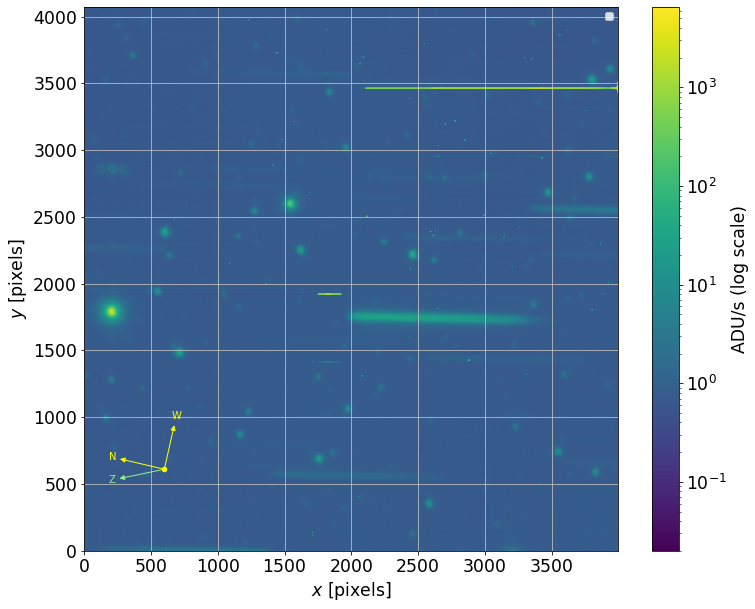

In [1235]:
image.plot_image(figsize=(12, 10),scale="log")

In [1236]:
filename_image

'Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_266.fits'

In [1237]:
guess = [1800, 2500] # filename_image=df['file'][0] , Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_188.fits, moved truncated
guess = [1800, 2500] # filename_image=df['file'][1], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_189.fits, idem
guess = [1800, 2500] # filename_image=df['file'][2], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_190.fits, idem
guess = [2100, 1750] # filename_image=df['file'][3], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_200.fits, horrible
guess = [2100, 1750] # filename_image=df['file'][4], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_201.fits, bad not rec
guess = [2100, 1750] # filename_image=df['file'][5], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_202.fits bad not rec
guess = [2100, 1750] # filename_image=df['file'][6], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_203.fits bad not rec
guess = [200, 1700] # filename_image=df['file'][7], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_204.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][8], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_205.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][9], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_206.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][10], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_207.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][11], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_208.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][12], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_209.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][13], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_210.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][14], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_211.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][15], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_212.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][16], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_213.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][17], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_214.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][18], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_215.fits  Reconstruit 
guess = [100, 1700] # filename_image=df['file'][19], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_216.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][20], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_217.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][21], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_218.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][22], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_219.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][23], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_220.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][24], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_221.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][25], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_222.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][26], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_223.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][27], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_224.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][28], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_225.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][29], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_226.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][30], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_227.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][31], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_228.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][32], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_229.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][33], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_230.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][34], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_231.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][35], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_232.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][36], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_233.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][37], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_234.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][38], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_235.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][39], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_236.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][40], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_237.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][41], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_238.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][42], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_239.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][43], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_240.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][44], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_241.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][45], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_242.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][46], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_243.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][47], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_244.fits  trop au bord pas re
guess = [100, 1700] # filename_image=df['file'][48], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_245.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][49], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_246.fits  trop au bord pas rec
guess = [100, 1700] # filename_image=df['file'][50], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_247.fits  trop au bor
guess = [100, 1700] # filename_image=df['file'][51], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_248.fits  trop au bord pas recd pas rec
guess = [100, 1700] # filename_image=df['file'][52], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_249.fits  trop au bord pas recd pas rec
guess = [100, 1700] # filename_image=df['file'][53], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_250.fits  trop au bord pas recd pas rec
guess = [100, 1700] # filename_image=df['file'][54], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_251.fits  trop au bord pas recd pas rec



guess = [100, 1700] # filename_image=df['file'][62], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_259.fits  trop au bord pas recd pas rec
guess = [200, 1700] # filename_image=df['file'][63], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_260.fits  REC
guess = [200, 1700] # filename_image=df['file'][64], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_261.fits  REC
guess = [300, 1800] # filename_image=df['file'][65], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_262.fits  bad foc, not rec
guess = [300, 1800] # filename_image=df['file'][66], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_263.fits  bad foc Not rec
guess = [300, 1800] # filename_image=df['file'][67], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_264.fits  bad foc Not rec
guess = [300, 1800] # filename_image=df['file'][68], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_265.fits  bad foc , REC
guess = [300, 1800] # filename_image=df['file'][69], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_266.fits  bad foc Not rec

In [1238]:
filename_image

'Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_266.fits'

2021-04-19 16:31:38  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0                c1_0                  c0_1         
    ----------------- --------------------- ----------------------
    4.541641299233509 -0.019636145460000986 -0.0027602678597205333
2021-04-19 16:31:39  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 20 iterations because the relative change of cost is below ftol=1.25e-05.


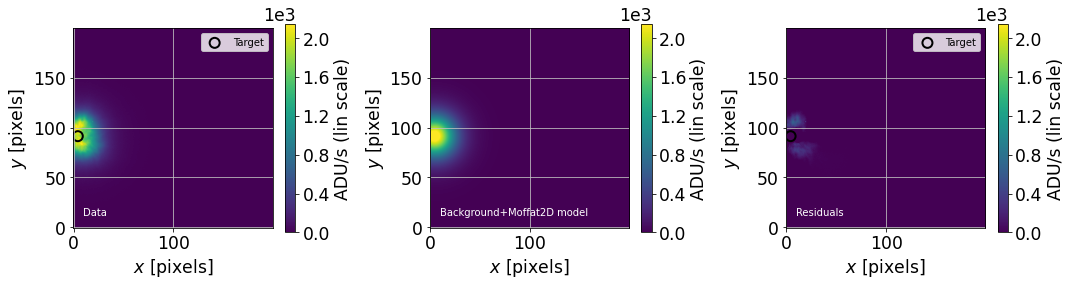

2021-04-19 16:31:40  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 3 iterations because the relative change of cost is below ftol=9.259259259259259e-05.


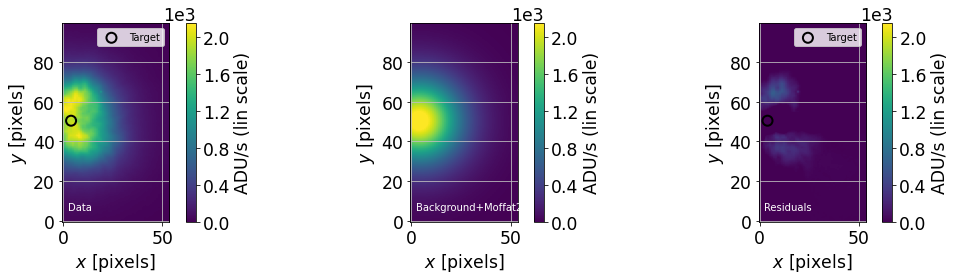

2021-04-19 16:31:41  Image      find_target          INFO   
	X,Y target position in pixels: 203.973,1791.452


In [1239]:

parameters.VERBOSE = True
parameters.DEBUG = True
x1, y1 = find_target(image, guess,rotated=False, use_wcs=False)

In [1240]:
print(x1,y1)

203.97316288487613 1791.4516863939537


In [1241]:
if x1>100:
    WID=100
else:
    WID=50
    

thumbnail=np.copy(image.data[int(y1)-WID:int(y1)+WID,int(x1)-WID:int(x1)+WID])
thumbnail_y=thumbnail.sum(axis=1)
thumbnail_x=thumbnail.sum(axis=0)
xx=np.linspace(int(x1)-WID,int(x1)+WID,len(thumbnail_x))
yy=np.linspace(int(y1)-WID,int(y1)+WID,len(thumbnail_y))
k0=kurtosis(thumbnail,axis=None,bias=True,fisher=True)
kx=kurtosis(thumbnail_x,bias=True,fisher=True)
ky=kurtosis(thumbnail_y,bias=True,fisher=True)
s0=skew(thumbnail,axis=None,bias=True)
sx=skew(thumbnail_x,bias=True)
sy=skew(thumbnail_y,bias=True)
        

In [1242]:
shape_str='\n'.join((
        r'skew     : Sk0 = {:3.3f}, Skx = {:3.3f}, Sky = {:3.3f} \n'.format(s0,sx,sy),
        r'kurtosis : K0  = {:3.3f}, Kx  = {:3.3f},  Ky = {:3.3f}'.format(k0,kx,ky)))

In [1243]:
skew_str='\n'.join((
        r'skew     : Sk0 = {:3.3f}'.format(s0),
        r'             : Skx = {:3.3f}'.format(sx),
        r'             : Sky = {:3.3f}'.format(sy)))

In [1244]:
kurt_str='\n'.join((
        r'kurtosis : K0 = {:3.3f}'.format(k0),
        r'             : Kx = {:3.3f}'.format(kx),
        r'             : Ky = {:3.3f}'.format(ky)))

In [1245]:
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [1246]:
#matplotlib.pyplot.hist(x, 
#                       bins=10, 
#                       range=None, 
#                       normed=False, 
#                       weights=None, 
#                       cumulative=False, 
#                       bottom=None, 
#                       histtype=u'bar', 
#                       align=u'mid', 
#                       orientation=u'vertical', 
#                       rwidth=None, 
#                       log=False, 
#                       color=None, 
#                       label=None, 
#                       stacked=False, 
#                       hold=None, 
#                       **kwargs)

Text(0.05, 0.4, 'kurtosis : K0 = 26.124\n             : Kx = 1.420\n             : Ky = 0.442')

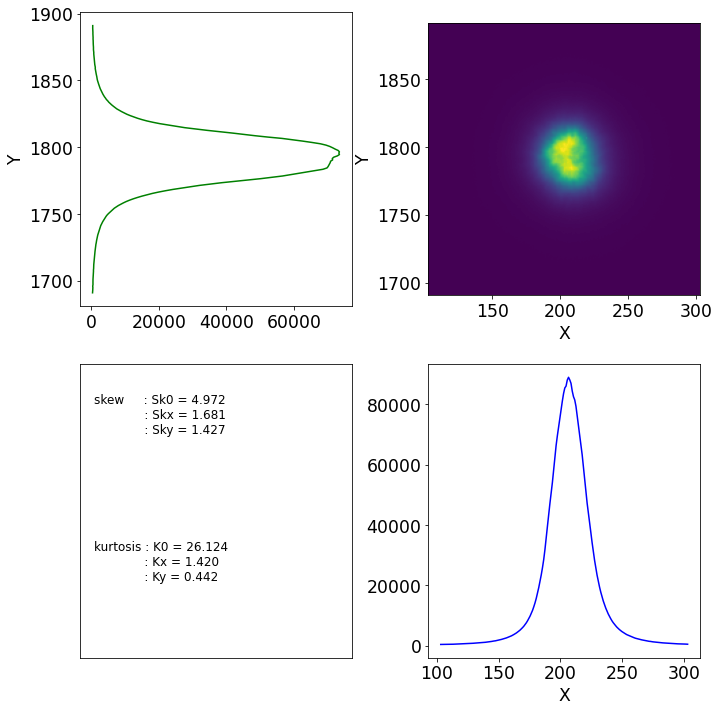

In [1247]:
fig=plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0.12, right=0.95, wspace=0.3,
                    bottom=0.15, top=0.9)

ax=fig.add_subplot(222)
ax.imshow(thumbnail,origin="lower",extent=(int(x1)-WID,int(x1)+WID,int(y1)-WID,int(y1)+WID))
ax.set_xlabel("X")
ax.set_ylabel("Y")

ax=fig.add_subplot(221)
base = plt.gca().transData
rot = transforms.Affine2D().rotate_deg(-90)
#ax.plot(yy,thumbnail_y,"g",rotation=u'vertical')
ax.plot(-yy,thumbnail_y,"g",transform= rot + base)
ax.set_ylabel("Y")

ax=fig.add_subplot(224)
ax.plot(xx,thumbnail_x,"b")
ax.set_xlabel("X")
plt.tight_layout()

ax=fig.add_subplot(223)
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])
#ax.text(0.05, 0.95, shape_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.text(0.05, 0.9, skew_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.text(0.05, 0.4, kurt_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)

# Go for spectrum reconstruction

2021-04-19 16:31:42  spectractor.extractor.extractor Spectractor          INFO   
	Start SPECTRACTOR


Section: paths
x disperser_dir: extractor/dispersers/	=> parameters.DISPERSER_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/	 <class 'str'>
x throughput_dir: simulation/AuxTelThroughput/	=> parameters.THROUGHPUT_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/simulation/AuxTelThroughput/	 <class 'str'>
Section: instrument
x obs_name: AUXTEL	=> parameters.OBS_NAME: AUXTEL	 <class 'str'>
x obs_altitude: 2.66299616375123	=> parameters.OBS_ALTITUDE: 2.66299616375123	 <class 'float'>
x obs_latitude: -30.2446389756252	=> parameters.OBS_LATITUDE: -30.2446389756252	 <class 'float'>
x obs_diameter: 1.20	=> parameters.OBS_DIAMETER: 1.2 m	 <class 'astropy.units.quantity.Quantity'>
x obs_epoch: J2000.0	=> parameters.OBS_EPOCH: J2000.0	 <class 'str'>
x obs_transmission_systematics: 0.005	=> parameters.OBS_TRANSMISSION_SYSTEMATICS: 0.005	 <class 'float'>
x obs_object_type: STAR	=> paramet

2021-04-19 16:31:42  Image      load_AUXTEL_image    INFO   
	Loading AUXTEL image /Users/dagoret/DATA/AuxTelData2021/ronchi170lpmm/FlipCleans/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_266.fits...
2021-04-19 16:31:42  Image      load_AUXTEL_image    INFO   
	Image loaded
2021-04-19 16:31:42  Image      load_image           INFO   
	Loading disperser ronchi170lpmm...
2021-04-19 16:31:42  Hologram   load_specs           INFO   
	Load disperser ronchi170lpmm:
	from /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/ronchi170lpmm
2021-04-19 16:31:42  Hologram   load_specs           INFO   
	Grating characteristics:
	N = 170.00 +/- 0.10 grooves/mm
	Average tilt of 0.0 degrees
2021-04-19 16:31:46  TelescopeTransmission reset_lambda_range   INFO   
	With filter RG610, set parameters.LAMBDA_MIN=563 and parameters.LAMBDA_MAX=1095.
2021-04-19 16:31:47  Star       load                 INFO   
	Simbad:
 MAIN_ID        RA           DEC     

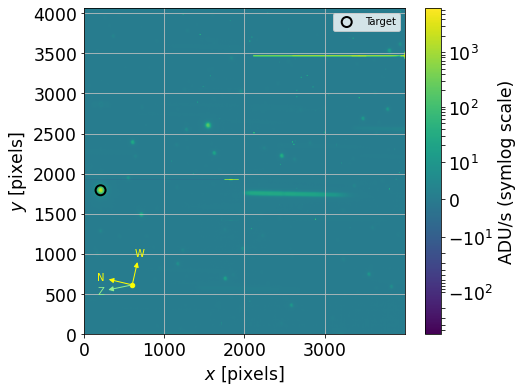

2021-04-19 16:31:52  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the image with guess=[ 203.97316288 1791.45168639]...
2021-04-19 16:31:52  spectractor.extractor.images find_target          INFO   
	No WCS /Users/dagoret/DATA/AuxTelData2021/ronchi170lpmm/FlipCleans/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_266_wcs/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_266.wcs available, use 2D fit to find target pixel position.
2021-04-19 16:31:52  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0                c1_0                   c0_1         
    ----------------- --------------------- -----------------------
    3.931090543633279 0.0037082152320783573 -0.00030463582918767836
2021-04-19 16:31:53  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 16 iterations because the relative change of cost is belo

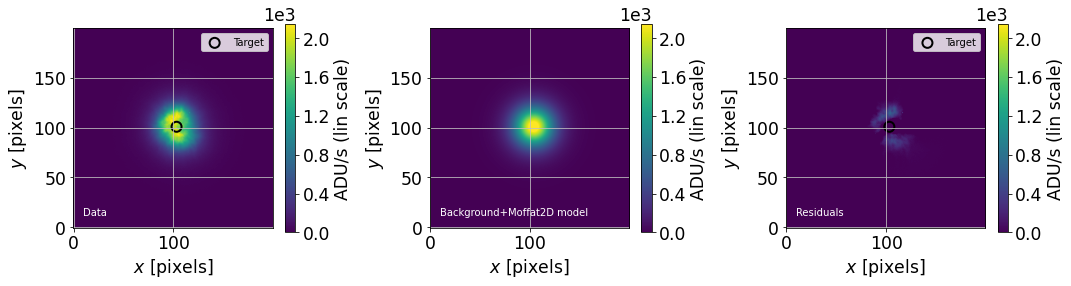

2021-04-19 16:31:54  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 2 iterations because the relative change of cost is below ftol=5e-05.


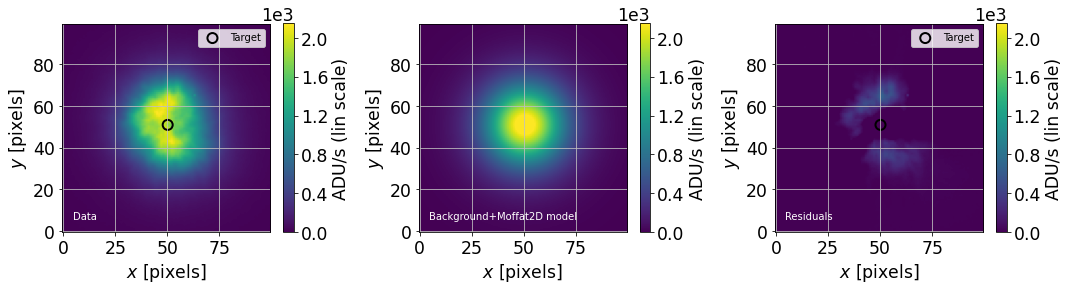

2021-04-19 16:31:54  Image      find_target          INFO   
	X,Y target position in pixels: 206.186,1791.877


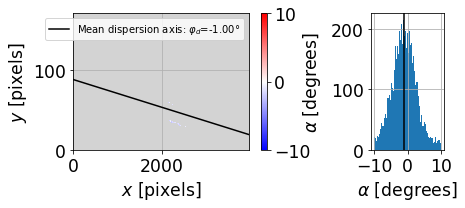

2021-04-19 16:31:56  Image      turn_image           INFO   
	Rotate the image with angle theta=-1.00 degree
/Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/tools.py:1713: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(vmin=vmin, vmax=vmax, linthresh=10)


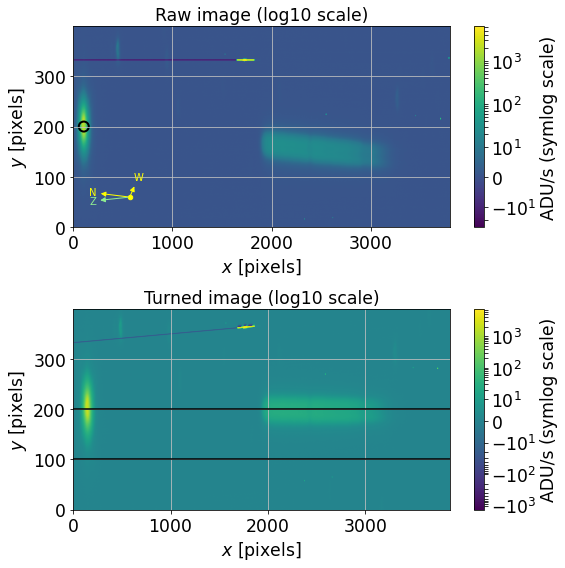

2021-04-19 16:32:07  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the rotated image...
2021-04-19 16:32:07  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0               c1_0                c0_1       
    ------------------ ------------------ -------------------
    50.012903892179956 0.1144733476565359 0.06405991833744365
2021-04-19 16:32:07  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 3 iterations because the relative change of cost is below ftol=5e-05.


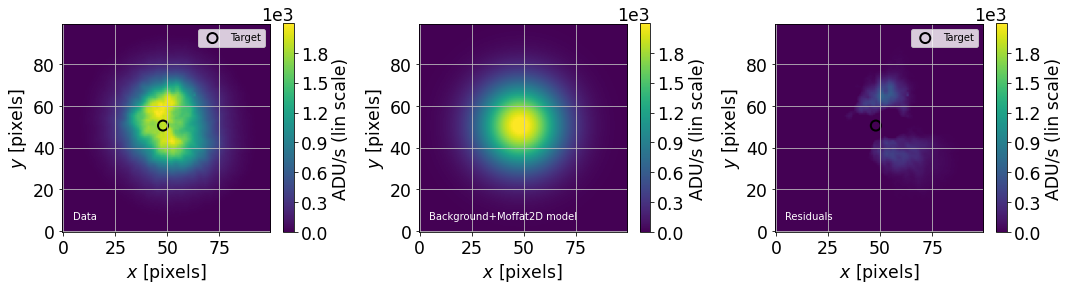

2021-04-19 16:32:09  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 15 iterations because the sum of parameter shift relative to the sum of the parameters is below xtol=1e-06.


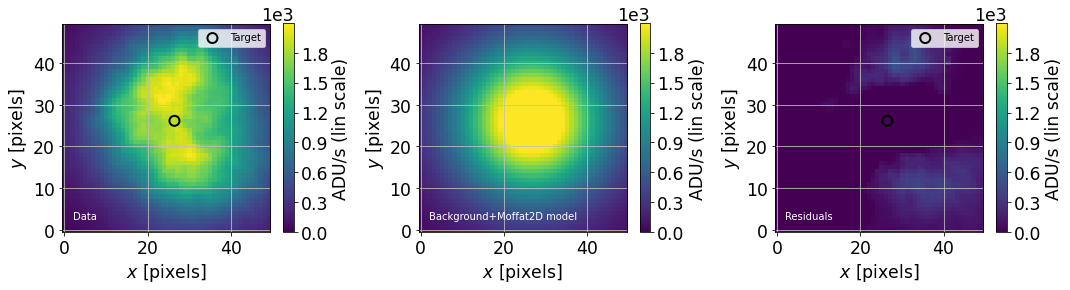

2021-04-19 16:32:10  Image      find_target          INFO   
	X,Y target position in pixels: 244.468,1795.162
2021-04-19 16:32:10  Spectrum   __init__             INFO   
	Spectrum info copied from image
2021-04-19 16:32:10  TelescopeTransmission reset_lambda_range   INFO   
	With filter RG610, set parameters.LAMBDA_MIN=565.0000000000005 and parameters.LAMBDA_MAX=1089.8000000001198.
2021-04-19 16:32:10  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*20 pixels and background from 140 to 180 pixels
2021-04-19 16:32:10  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extract spectrogram: crop rotated image [1933:3543,1615:1975] (size (1610, 360))


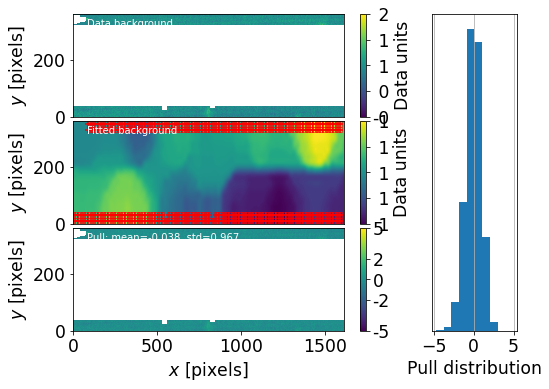

2021-04-19 16:32:13  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Start PSF1D transverse fit...
2021-04-19 16:32:33  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: amplitude has a null Jacobian; parameter is fixed at its last known current value (-10.386469419118523).
2021-04-19 16:32:33  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: y_c has a null Jacobian; parameter is fixed at its last known current value (180.0).
2021-04-19 16:32:33  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: gamma has a null Jacobian; parameter is fixed at its last known current value (3.0).
2021-04-19 16:32:33  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: alpha has a null Jacobian; parameter is fixed at its last known current value (2.0).
2021-04-19 16:32:33  spectractor.fit.fitter gradient_descent     WARNING 
	Gradient descent terminated in 0 iterations because all parameters have null Jacobian.
2021-04-19 16:32:33  spect

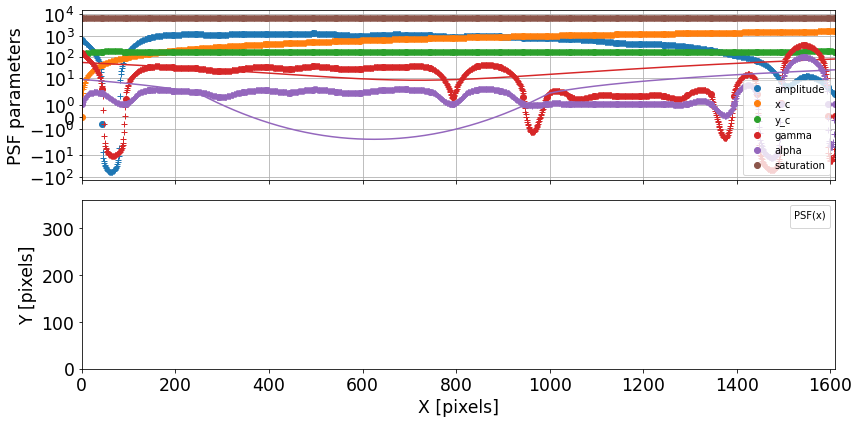

2021-04-19 16:32:40  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=1.8035e+06 initial chisq_red=28.004
		 Line search: alpha_min=0.382 iter=3 funcalls=7
	Parameter shifts: [ -0.05543603   0.0858285    0.26181931  10.25837428 -16.48904302
  13.1276198    0.86301066  -2.26784783   1.69141225]
	New parameters: [ -2.25968161   5.12002045   3.28866637  23.71203054 -49.40964348
  -5.65183737   2.40740942  -3.8804708    0.39074274]
	Final cost=1.6016e+06 final chisq_red=24.869 computed in 2.00s
2021-04-19 16:32:42  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=1: initial cost=1.6016e+06 initial chisq_red=24.869
		 Line search: alpha_min=1 iter=1 funcalls=5
	Parameter shifts: [ -0.1615662    0.2277892    0.76155831 -13.4384852   15.59266398
 -44.7251711   -1.49672546   1.88371149  -2.82138618]
	New parameters: [ -2.4212478    5.34780965   4.05022468  10.27354535 -33.8169795
 -50.37700847   0.91068395  -1.9967593   -2.43064344]
	Final cost=1.183

2021-04-19 16:33:08  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=15: initial cost=5.0967e+05 initial chisq_red=7.9141
		 Line search: alpha_min=2.62 iter=5 funcalls=10
	Parameter shifts: [-4.40443001e-02  3.96516540e-03  4.32136617e-03  4.95252074e+02
 -9.87412094e+02 -1.78139003e+03 -1.88671292e-01 -5.75533204e-01
 -3.70970836e-01]
	New parameters: [-3.30091324e+00  5.28268582e+00  8.69481899e+00  2.57140552e+03
 -5.30703355e+03 -9.52220911e+03  2.29952485e+00 -3.25824376e-02
  6.55701171e-01]
	Final cost=5.0552e+05 final chisq_red=7.8497 computed in 2.29s
2021-04-19 16:33:10  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=16: initial cost=5.0552e+05 initial chisq_red=7.8497
		 Line search: alpha_min=1 iter=1 funcalls=5
	Parameter shifts: [ 1.62459200e-02 -4.67709445e-02 -3.47795402e-02  2.96201103e+02
 -5.93348476e+02 -1.06731563e+03  9.93696420e-02  3.34601622e-01
  1.92228454e-01]
	New parameters: [-3.28466732e+00  5.23591488e+00  8.66003945e+00  

2021-04-19 16:33:35  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=32: initial cost=5.0048e+05 initial chisq_red=7.7714
		 Line search: alpha_min=2.48 iter=0 funcalls=5
	Parameter shifts: [-0.00777878 -0.00672077 -0.02399563 -0.01225302  0.02158386 -0.03646311]
	New parameters: [-3.4717753   4.75654201  7.86033384  2.38863009  0.26849032  0.7435517 ]
	Final cost=5.0044e+05 final chisq_red=7.7709 computed in 1.29s
2021-04-19 16:33:36  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=33: initial cost=5.0044e+05 initial chisq_red=7.7709
		 Line search: alpha_min=1.62 iter=1 funcalls=5
	Parameter shifts: [ 0.00121369 -0.01677614 -0.01546166  0.01275451 -0.02539949  0.03395058]
	New parameters: [-3.47056161  4.73976587  7.84487218  2.4013846   0.24309083  0.77750228]
	Final cost=5.0039e+05 final chisq_red=7.7701 computed in 1.27s
2021-04-19 16:33:38  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=34: initial cost=5.0039e+05 initial chisq_red=7.

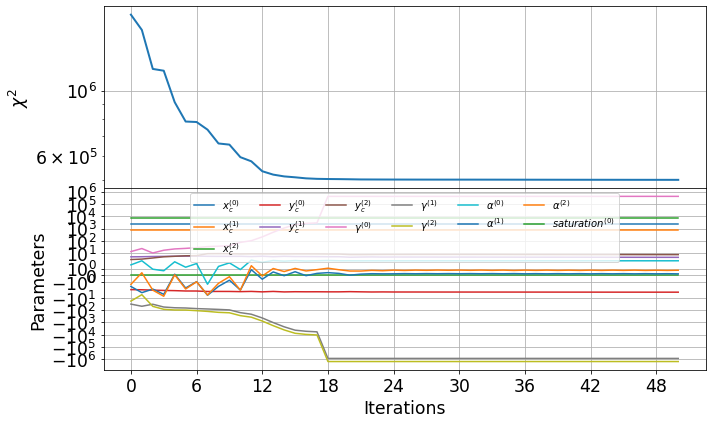

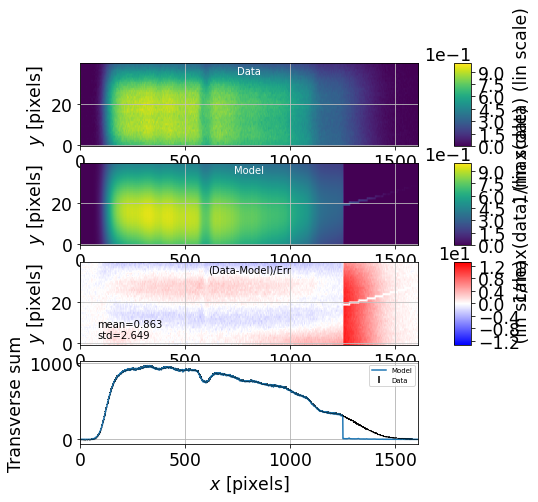

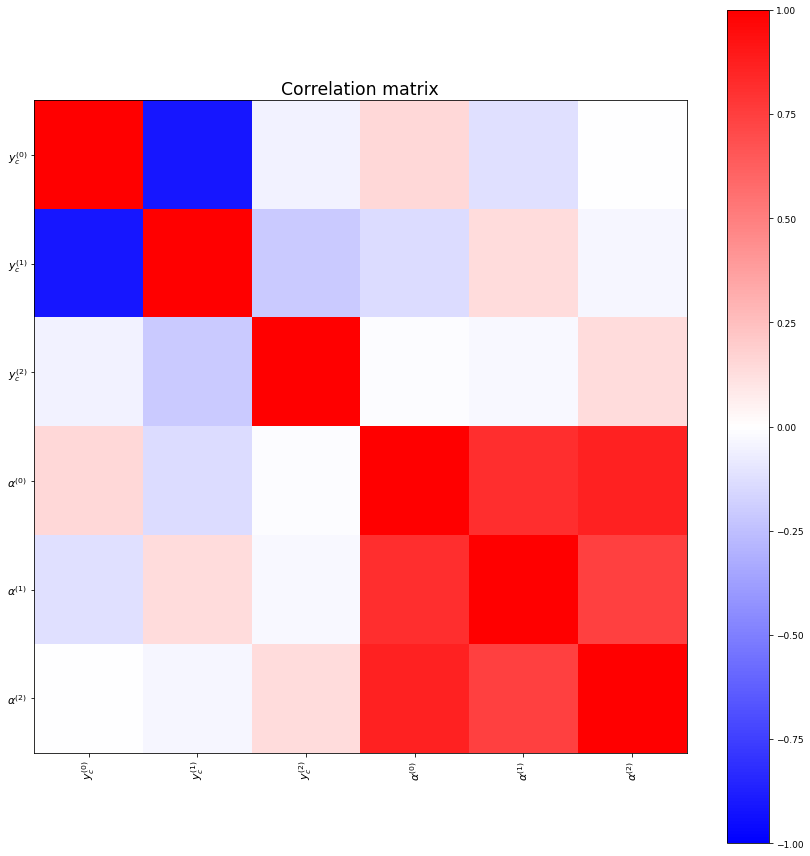

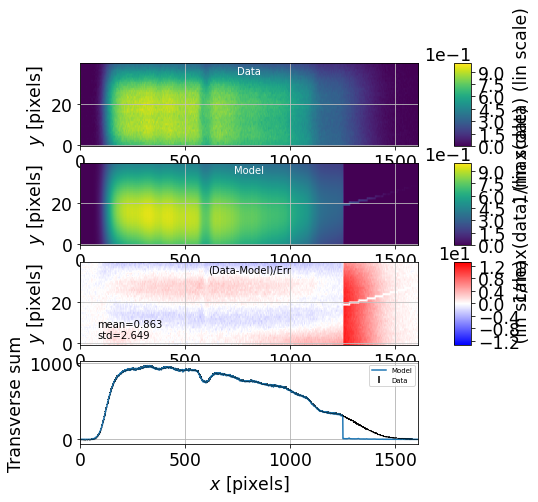

2021-04-19 16:34:06  spectractor.extractor.extractor extract_spectrum_from_image DEBUG  
	Transverse fit table before derotation:
     amplitude       x_c   ...          Dy         Dy_disp_axis
------------------- ------ ... ------------------- ------------
 -71.80131630108342    0.0 ... -0.5319750802625549          0.0
-148.71575339988857    1.0 ... -0.5545402257981777          0.0
-30.125798591672794    2.0 ... -0.5770702435610247          0.0
 228.01689236701523    3.0 ... -0.5995651335510104          0.0
 105.92809526598946    4.0 ... -0.6220248957682202          0.0
 -574.7245129113704    5.0 ... -0.6444495302125972          0.0
  624.7854667429824    6.0 ... -0.6668390368841699          0.0
 150.91613612166293    7.0 ... -0.6891934157829098          0.0
 -423.3525362134147    8.0 ... -0.7115126669088454          0.0
 -524.0996887760874    9.0 ... -0.7337967902619766          0.0
                ...    ... ...                 ...          ...
  1246.031813154223 1599.0 ...   8.265

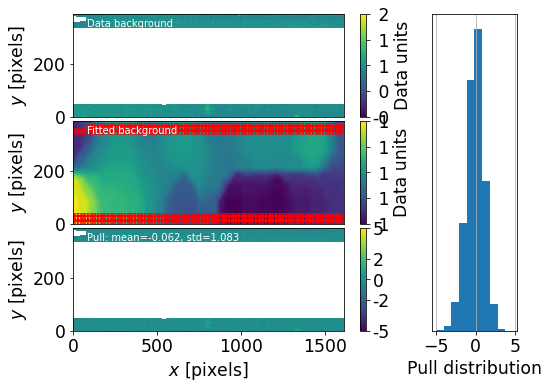

2021-04-19 16:34:10  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Background statistics: mean=0.835 ADU/s, RMS=0.370 ADU/s.
2021-04-19 16:34:10  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extract spectrogram: crop image [1894:3504,1554:1943] (size (1610, 389))
	New target position in spectrogram frame: [-1687.8144384443347, 237.877292331744]


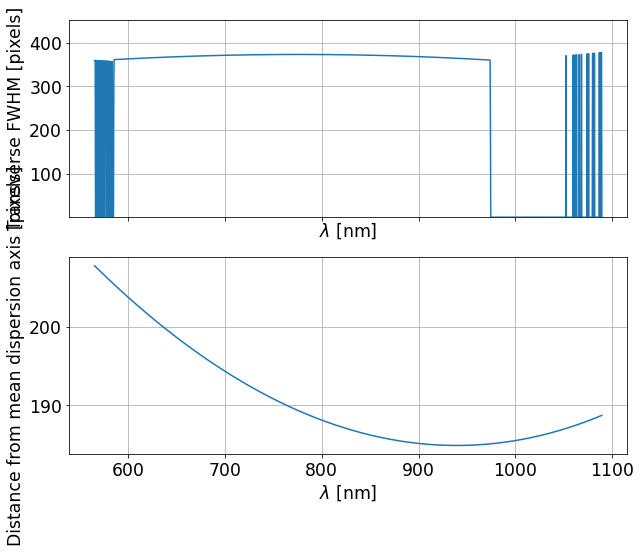

/Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/tools.py:1713: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(vmin=vmin, vmax=vmax, linthresh=10)


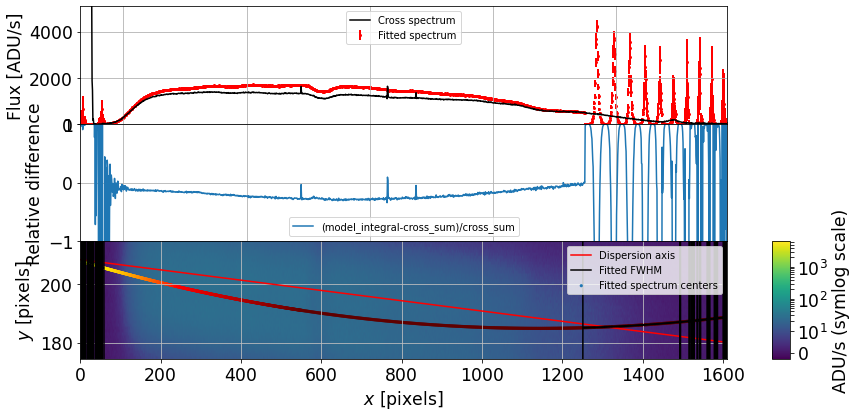

2021-04-19 16:34:13  spectractor.extractor.extractor Spectractor          INFO   
	Calibrating order 1 spectrum...
2021-04-19 16:34:27  Spectrum   calibrate_spectrum   WARNING 
	Minimum chisq is on the edge of the exploration grid.


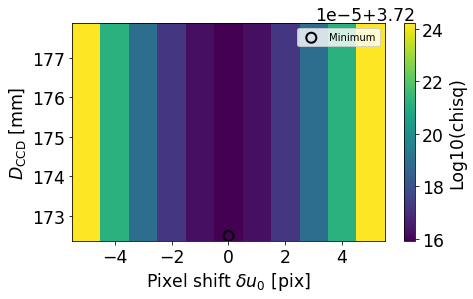

spectrum/calibrate_spectrum::pixel_shift_step= 1.0
spectrum/calibrate_spectrum::parameters.DISTANCE2CCD_ERR= 0.5
spectrum/calibrate_spectrum::error= (0.5, 1.0)
spectrum/calibrate_spectrum::start= [172.4980011   0.       ]


2021-04-19 16:34:31  Spectrum   calibrate_spectrum   INFO   
	Order0 total shift: 0.000pix
	D = 172.498 mm (default: DISTANCE2CCD = 175.00 +/- 0.50 mm, -5.0 sigma shift)
2021-04-19 16:34:31  astropy    _showwarning         WARNING VerifyWarning: Card is too long, comment will be truncated.
2021-04-19 16:34:31  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_266_spectrum.fits
2021-04-19 16:34:32  Spectrum   save_spectrogram     INFO   
	Spectrogram saved in ./outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_266_spectrogram.fits


  Line   Tabulated Detected   Shift    ...  Chisq   Eqwidth_mod Eqwidth_data
             nm       nm        nm     ... reduced       nm          nm     
-------- --------- -------- ---------- ... -------- ----------- ------------
$O_2(Z)$   822.696 808.0451 -14.650905 ... 1815.263    6.965884    21.231169


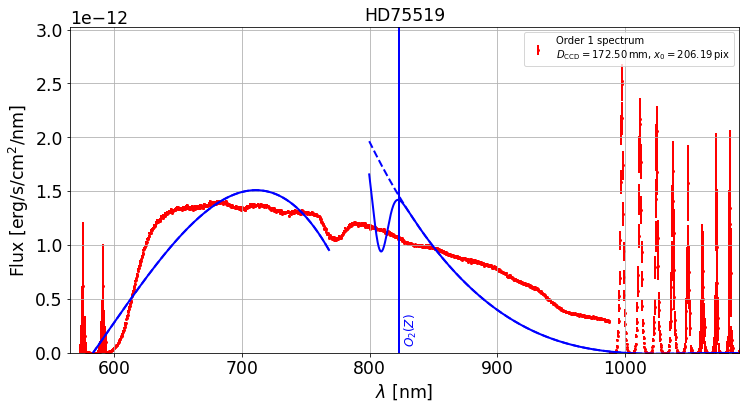

In [1248]:
spectrum = Spectractor(filename, output_directory, guess=[x1,y1], target_label=target, disperser_label=disperser_label, config=config)